<a href="https://colab.research.google.com/github/Seungwon-hub/ESAA/blob/main/ESAA_YB_Week6_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3. 앙상블 학습

### 앙상블 학습 개요

앙상블 학습을 통한 분류는 여러 개의 분류기를 생성하고 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법. 앙상블 학습의 목표는 다양한 분류기의 예측 결과를 결합함으로써 단일 분류기보다 신뢰성이 높은 예측값을 얻는 것.

정형 데이터 분류시 앙상블이 뛰어난 성능을 나타냄. 앙상블 알고리즘의 대표격인 랜덤 포레스트, 그래디언트 부스팅 알고리즘은 많이 애용. XGBoost, LightGBM 과 같은 최신 알고리즘 개발됨.

앙상블 학습의 유형은 전통적으로 보팅, 배깅, 부스팅으로 나눌 수 있음. 보팅, 배깅은 여러 개의 분류기가 투표를 통해 최종 예측 결과 결정하는 방식. 보팅은 서로 다른 알고리즘을 가진 분류기를 결합하는 것이고, 배깅의 경우 각각의 분류기가 모두 같은 알고리즘 기반이지만, 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행함.

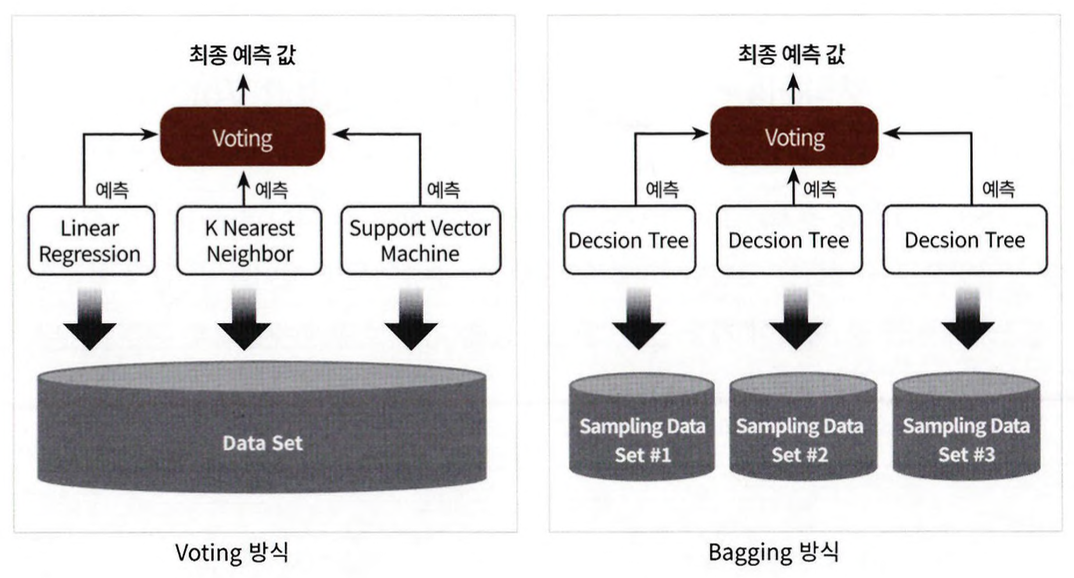

왼쪽 그림은 보팅 분류기. 3개의 ML 알고리즘이 같은 데이터 세트 학습하고 예측한 결과를 가지고 보팅을 통해 최종 예측 결과를 선정

오른쪽 그림은 배깅 분류기. 단일 ML 알고리즘으로 여러 분류기가 학습으로 개별 예측. 개별 Classifier에게 데이터를 샘플링해서 추출하는 방식을 부트스트래핑 분할 방식이라 함,



### 보팅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting)

- 하드 보팅: 예측한 결괏값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정하는 것.
- 소프트 보팅: 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정.

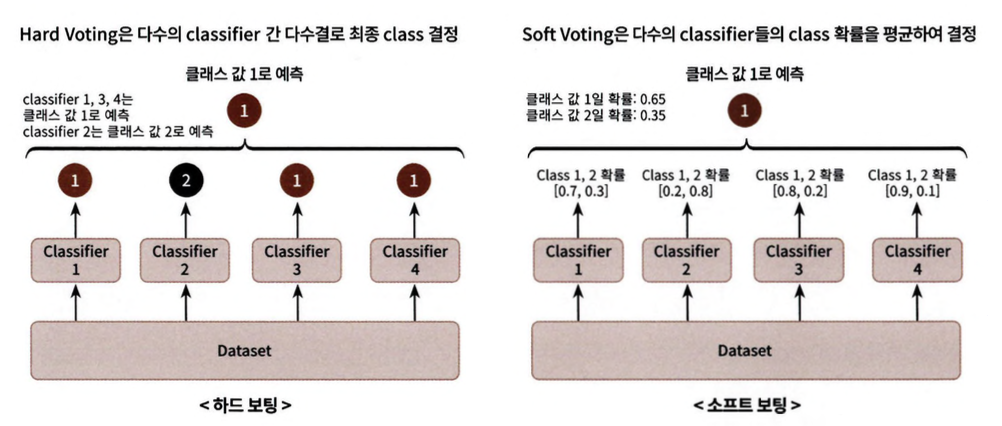

왼쪽 그림은 하드 보팅. Classifier 1번, 3번, 4번이 1로 레이블 값 예측하고 분류기 2번이 2로 레이블 값 예측하면 다수결 원칙에 따라 레이블 값 1이 됨.

오른쪽 그림은 소프트 보팅. 각 분류기의 레이블 값 예측 확률을 평균을 내어 최종 결정함.

### 보팅 분류기 (Voting Classifier)

- 사이킷런 VotingClassifier 클래스 제공

위스콘신 유방암 데이터 세트를 보팅 방식의 앙상블을 이용해 예측 분석.

In [2]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


로지스틱 회귀와 KNN을 기반으로 하여 소프트 보팅 방식으로 보팅 분류기 만듦.

In [3]:
# 개별 모델은 로지스틱 회귀와 KNN임
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델은 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)

print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]

for classifier in classifiers:
  classifier.fit(X_train, y_train)
  pred = classifier.predict(X_test)
  class_name = classifier.__class__.__name__
  print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도: 0.9561
LogisticRegression 정확도: 0.9474
KNeighborsClassifier 정확도: 0.9386


보팅 분류기의 정확도가 조금 높게 나타났는데, 보팅으로 여러 개의 기반 분류기를 결합한다고 해서 무조건 예측 성능이 향상되는 것은 아님. 데이터 특성과 분포 등 다양한 요건에 따라 기반 분류기 중 가장 좋은 분류기의 성능이 보팅보다 나을 수도 있음.

그래도 앙상블 방법은 전반적으로 다른 단일 ML 알고리즘보다 뛰어난 예측 성능을 가지는 경우가 많음. 현실 세계는 다양한 변수와 예측이 어려운 규칙으로 구성돼 있음. 다양한 관점을 가진 알고리즘이 서로 결합해 더 나은 성능을 실제 환경에서 끌어낼 수 있음.

## 4. 랜덤 포레스트

### 랜덤 포레스트의 개요 및 실습
배깅은 같은 알고리즘으로 여러 개의 분류기를 만들어서 보팅으로 최종 결정하는 알고리즘임. 랜덤 포레스트의 기반 알고리즘은 결정 트리로서, 결정 트리의 쉽고 직관적인 장점을 갖고 있음.

랜덤 포레스트는 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정을 하게 됨.

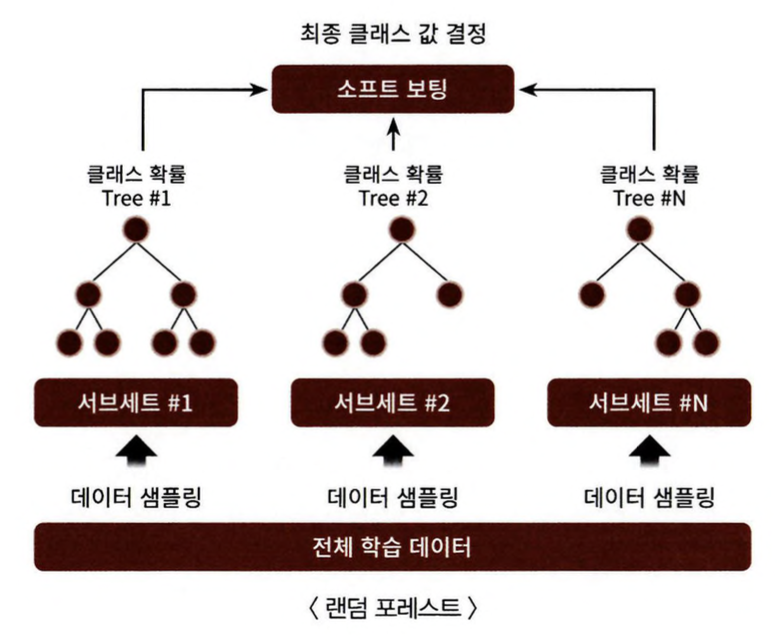

랜덤 포레스트는 개별적인 분류기의 기반 알고리즘은 결정 트리지만 개별 트리가 학습하는 데이터 세트는 전체 데이터에서 일부가 중첩되게 샘플링된 데이터 세트임. 이렇게 여러 개의 데이터 세트를 중첩되게 분리하는 것을 부트스트래핑(bootstrapping) 분할 방식이라 함.

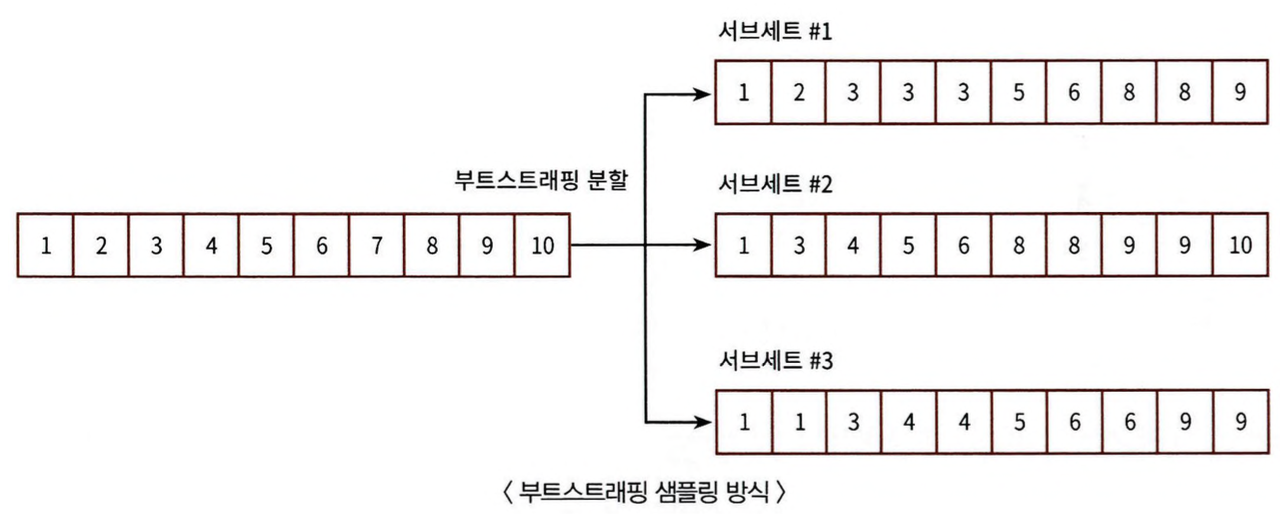

In [4]:
def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
  feature_dup_df = feature_dup_df.reset_index()
  new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1])
  if x[1]>0 else x[0], axis=1)

  new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
  return new_feature_name_df

def get_human_dataset():

  # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep로 할당
  feature_name_df = pd.read_csv('features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])

  # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성
  new_feature_name_df = get_new_feature_name_df(feature_name_df)

  # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
  feature_name = new_feature_name_df.iloc[:,1].values.tolist()

  # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
  X_train = pd.read_csv('X_train.txt', sep='\s+', names=feature_name)
  X_test = pd.read_csv('X_test.txt', sep='\s+', names=feature_name)

  # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
  y_train = pd.read_csv('y_train.txt', sep='\s+', header=None, names=['action'])
  y_test = pd.read_csv('y_test.txt', sep='\s+', header=None, names=['action'])

  # 로드된 학습/테스트용 DataFrame을 모두 반환
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

<ipython-input-4-5a09e6955359>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if x[1]>0 else x[0], axis=1)
<ipython-input-4-5a09e6955359>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1])
<ipython-input-4-5a09e6955359>:23: DtypeWarning: Columns (489) have mixed types. Specify dtype option on import or set low_memory=False.
  X_train = pd.read_csv('X_train.txt', sep='\s+', names=feature_name)


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset()를 이용해 학습/테스트 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0, max_depth=8)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9220


### 랜덤 포레스트 하이퍼 파라미터 및 튜닝

트리 기반의 앙상블 알고리즘 단점은 하이퍼 파라미터가 너무 많고, 그로 인해 튜닝을 위한 시간이 많이 소모된다는 것. 또한 많은 시간을 소모했음에도 튜닝 후 예측 성능이 크게 향상되는 경우가 많지 않음.

- n_estimators: 결정 트리의 개수, 디폴트는 10, 계속 증가시킨다고 성능이 무조건 향상되는 것은 아님.
- max_features: 랜덤 포레스트의 트리를 분할하는 피처를 참조할 때 전체 피처가 아니라 sqrt만큼 참조함.


GridSearchCV 이용해 랜덤 포레스트의 하이퍼 파라미터를 튜닝해보겠음.

In [7]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth':[8,16,24],
    'min_samples_leaf':[1,6,12],
    'min_samples_split': [2,8,16]
}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도:{0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 16}
최고 예측 정확도:0.9157


In [8]:
rf_clf1 = RandomForestClassifier(n_estimators=100, min_samples_leaf=6, max_depth=16, min_samples_split=2, random_state=0)

rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)

print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9253


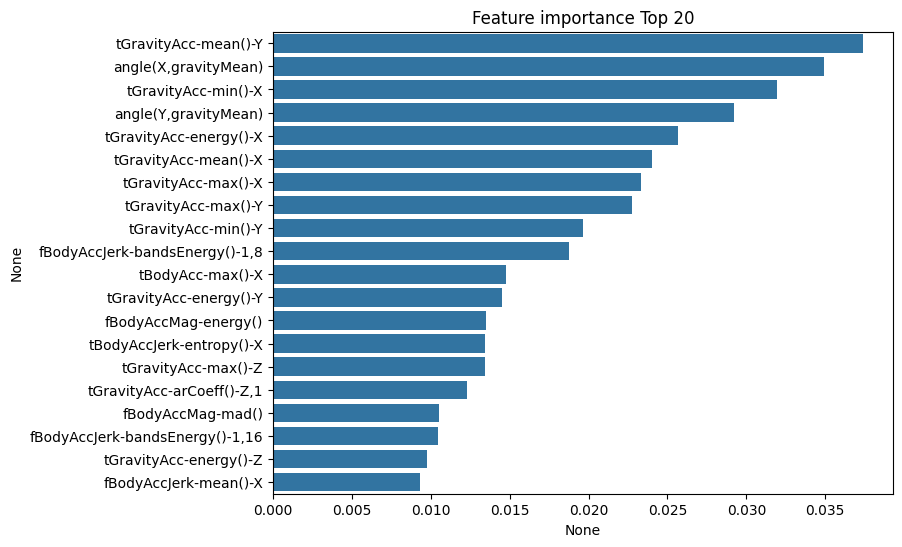

In [9]:
# 피처 중요도를 막대그래프로 시각화

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importance Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

## GBM (Gradient Boosting Machine)

### GBM의 개요 및 실습
부스팅 알고리즘은 여러 개의 약한 학습기를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여하면서 부스팅을 수행하는 대표적인 알고리즘임.

부스팅의 대표적인 구현은 AdaBoost(Adaptive boosting)와 그래디언트 부스트가 있음. 에이다 부스트는 오류 데이터에 가중치를 부여하면서 부스팅을 수행하는 대표적인 알고리즘.

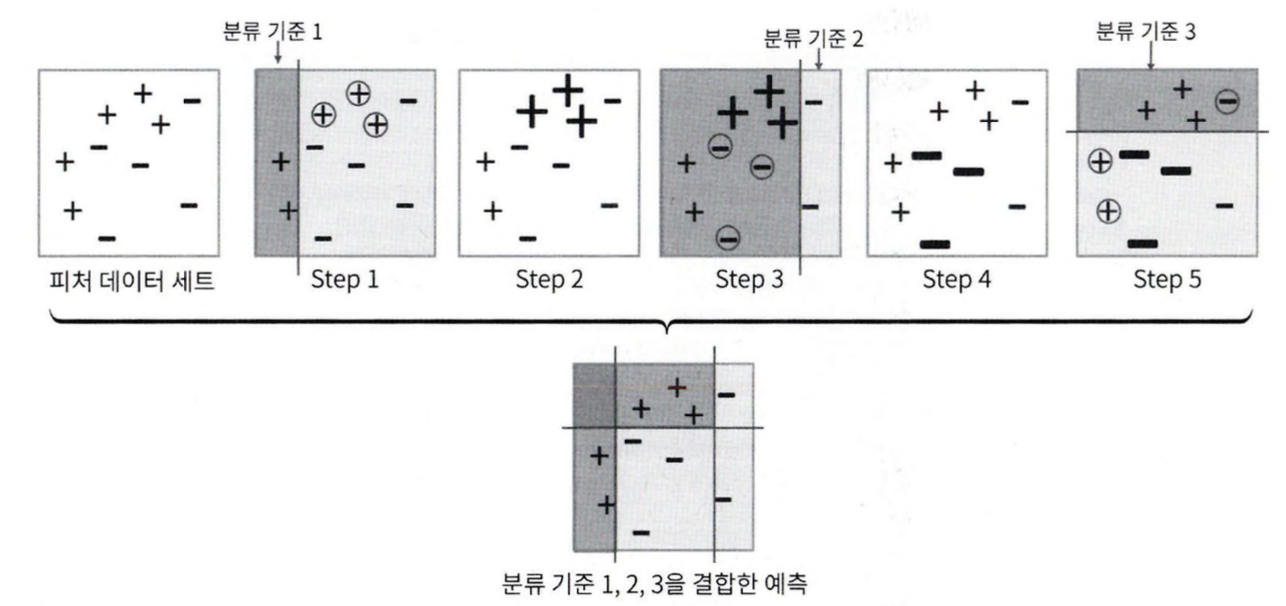

<에이다부스트 학습 진행>
- Step1: 첫 번째 약한 학습기가 분류 기준 1로 +와-를 분류한 것. 동그라미 표시로 된 데이터는 잘못 분류된 오류 데이터.
- Step2: 오류 데이터에 대해서 가중치 값을 부여. 가중치가 부여된 오류 + 데이터는 다음 약한 학습기가 더 잘 분류할 수 있게 크기 커짐
- Step3: 두 번째 약한 학습기가 분류 기준 2로 +와 - 분류함. 동그라미 표시된 데이터는 잘못 분류된 오류 데이터
- Step4: 잘못 분류된 이 - 오류 데이터에 대해 다음 약한 학습기가 잘 분류할 수 있게 더 큰 가중치 부여
- Step5: 세 번째 약한 학습기가 분류 기준 3으로 +와 -를 분류하고 오류 데이터 찾음.

에이다부스트는 이렇게 약한 학습기가 순차적으로 오류 값에 대해 가중치를 부여한 예측 결정 기준을 모두 결합해 예측 수행. 맨 아래에는 첫 번째, 두 번째, 세 번째 약한 학습기를 모두 결합한 결과 예측임. 개별 약한 학습기보다 훨씬 정확도 높아졌음을 알 수 있음.

사이킷런은 GBM 기반의 분류를 위해서 GradientBoostingClassfier 클래스 제공.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()
gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간: {0:.1f} 초'.format(time.time()-start_time))

기본 하이퍼 파라미터만으로 앞의 랜덤 포레스트보다 나은 예측 성능을 나타냄. 일반적으로 GBM이 랜덤 포레스트보다 예측 성능이 뛰어난 경우가 많음. 하지만 수행 시간이 오래 걸리고 하이퍼 파라미터 튜닝 노력도 더 필요함.

### GBM 하이퍼 파라미터 소개
- loss: 경사 하강법에서 사용할 비용 함수 지정
- learning_rate: GBM이 학습을 진행할 때마다 적용하는 학습률임.
- n_estimators: weak learner의 개수
- subsample: weak learner가 학습에 사용하는 데이터의 샘플링 비율



## 6. XGBoost(eXtra Gradient Boost)

### XGBoost 개요
분류에 있어서 일반적으로 다른 머신러닝보다 뛰어난 예측 성능을 나타냄.
- 뛰어난 예측 성능
- GBM 대비 빠른 수행 시간
- 과적합 규제
- Tree Pruning
- 자체 내장된 교차 검증
- 결손값 자체 처리

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

### 파이썬 래퍼 XGBoodst 하이퍼 파라미터

XGBoost는 GBM과 유사한 하이퍼 파라미터를 동일하게 가지고 있으며, 여기에 조기 중단, 과적합을 규제하기 위한 하이퍼 파라미터가 추가됨.

파이썬 래퍼 XGBoost 하이퍼 파라미터 유형별로 나누기
- 일반 파라미터: 일반적으로 실행 시 스레드의 개수나 silent모드 등의 선택을 위한 파라미터로서 디폴트 파라미터 값을 바꾸는 경우는 거의 없음
- 부스터 파라미터:트리 최적화, 부스팅, regularization 등과 관련 파라미터 등을 지칭함.
- 학습 태스크 파라미터: 학습 수행 시의 객체 함수, 평가를 위한 지표 등을 설정하는 파라미터

<주요 일반 파라미터>
- booster: gbtree(tree based model) 또는 gblinear(linear model) 선택.
- silent: 디폴트는 0이며, 출력 메시지 나타내고 싶지 않을 경우 1로 설정.
- nthread: CPU의 실행 스레드 개수 조정. 디폴트는 CPU의 전체 스레드를 다 사용하는 것.

<주요 부스터 파라미터>
- eta
- num_boost_rounds
- min_child_weight[default=1]
- gamma[default=0, alias:min_split_loss]
- max_depth[default=6]
- sub_sample[default=1]
- colsample_bytree[default=1]
- lambda[default=1, alias:reg_lambda]
- alpha[default=0, alias: reg_alpha]
- scale_pos_weight[default=1]

<학습 태스크 파라미터>
- objective: 최솟값을 가져야 할 손실 함수 정의
- binary:logistic: 이진 분류일 때 적용
- multi:softmax: 다중 분류일 때 적용
- multi:softprob: 개별 레이블 클래스의 해당되는 예측 확률 반환

< 과적합 문제 심각할 때 다음 고려 >
- eta 값 낮춤
- max_depth 값 낮춤
- min_child_weight 값 높임
- gamma 높임



### 파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측

XGBoost는 자체적으로 교차 검증, 성능 평가, 피처 중요도 등의 시각화 기능이 있음. 조기 중단 기능이 있어 부스팅 반복 횟수에 도달하지 않더라도 더 이상 예측 오류가 개선되지 않으면 반복을 끝까지 수행하지 않고 중지해 수행 시간을 개선하는 기능을 갖고 있음.

위스콘신 유방암 데이터 세트는 종양의 크기, 모양 등의 다양한 속성값을 기반으로 악성 종양인지 양성 종양인지 분류한 데이터 세트.

In [1]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
features = dataset.data
labels = dataset.target
cancer_df = pd.DataFrame(data=features, columns=dataset.feature_names)
cancer_df['target'] = labels
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [2]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
target
1    357
0    212
Name: count, dtype: int64


양성 benign이 357개, 악성 malignant가 212개로 구성


In [3]:
# cancer_df에서 feature용 DataFrame과 Label용 Series 객체 추출
# 맨 마지막 칼럼이 Label임. Feature용 DataFrame은 cancer_df의 첫번째 칼럼에서 맨 마지막 두번째 칼럼까지를 :-1 슬라이싱으로 추출
X_features = cancer_df.iloc[:,:-1]
y_label = cancer_df.iloc[:,-1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val=train_test_split(X_train, y_train, test_size=0.1, random_state=156)

print(X_train.shape, X_test.shape)
print(X_tr.shape, X_val.shape)

(455, 30) (114, 30)
(409, 30) (46, 30)


- 전체 569개의 데이터 세트에서 최종 학습용 409개, 검증용 46개, 테스트용 114개가 추출

XGBoost만의 DMatrix를 사용. DMatrix의 주요 입력 파라미터는 data와 label임.

In [5]:
dtr = xgb.DMatrix(data=X_tr.values, label=y_tr)
dval = xgb. DMatrix(data=X_val.values, label=y_val)
dtest = xgb.DMatrix(data=X_test.values, label=y_test)

In [6]:
params = {
    'max_depth':3,
    'eta':0.05,
    'objective':'binary:logistic',
    'eval_metric':'logloss'
}
num_rounds = 400

<하이퍼 파라미터>
- max_depth: 트리 최대 깊이
- eta: 학습률
- objective: 예제 데이터가 이진 분류이므로 목적함수는 이진 로지스틱
- logloss: 오류 함수의 평가 성능 지표
- num_rounds: 부스팅 반복 횟수

파이썬 래퍼 XGBoost는 하이퍼 파라미터를 xgboost모듈의 train()함수에 파라미터로 전달. 조기 중단은 더 이상 지표 개선이 없을 경우에 num_boost_round 횟수를 모두 채우지 않고 중간에 반복을 빠져 나올 수 있도록 하는 것.

조기 중단의 성능 평가는 주로 별도의 검증 데이터 세트를 이용. XGBoost는 학습 반복 시마다 검증 데이터 세트를 이용해 성능을 평가할 수 있는 기능을 제공. 조기 중단의 파라미터는 **early_stopping_rounds**.

In [7]:
# 학습 데이터 셋은 'train' 또는 평가 데이터 셋은 'eval'로 명기
eval_list = [(dtr, 'train'),(dval, 'eval')] # 또는 eval_list = [(dval, 'eval')]만 명기해도 무방

# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtr, num_boost_round=num_rounds, \
                      early_stopping_rounds=50, evals=eval_list)


[0]	train-logloss:0.62480	eval-logloss:0.63104
[1]	train-logloss:0.58674	eval-logloss:0.60478
[2]	train-logloss:0.55226	eval-logloss:0.58223
[3]	train-logloss:0.52086	eval-logloss:0.56184
[4]	train-logloss:0.49192	eval-logloss:0.54118
[5]	train-logloss:0.46537	eval-logloss:0.52223
[6]	train-logloss:0.44029	eval-logloss:0.50287
[7]	train-logloss:0.41666	eval-logloss:0.48620
[8]	train-logloss:0.39525	eval-logloss:0.46974
[9]	train-logloss:0.37542	eval-logloss:0.45497
[10]	train-logloss:0.35701	eval-logloss:0.44131
[11]	train-logloss:0.33982	eval-logloss:0.43134
[12]	train-logloss:0.32297	eval-logloss:0.41972
[13]	train-logloss:0.30725	eval-logloss:0.40902
[14]	train-logloss:0.29327	eval-logloss:0.39883
[15]	train-logloss:0.27946	eval-logloss:0.38968
[16]	train-logloss:0.26691	eval-logloss:0.38150
[17]	train-logloss:0.25473	eval-logloss:0.37368
[18]	train-logloss:0.24385	eval-logloss:0.36666
[19]	train-logloss:0.23338	eval-logloss:0.35994
[20]	train-logloss:0.22320	eval-logloss:0.35374
[2

In [8]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결괏값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정하여 list 객체인 preds에 저장
preds = [1 if x>0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:', preds[:10])

predict() 수행 결괏값을 10개만 표시, 예측 확률 값으로 표시됨
[0.938 0.004 0.75  0.049 0.98  1.    0.999 0.999 0.998 0.001]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


테스트 데이터 세트에 예측을 수행. XGBoost는 train() 함수를 호출해 학습이 완료된 모델 객체를 반환하게 되는데, 이 모델 객체는 예측을 위해 predict()메서드를 이용. xgboost의 predict()는 예측 결괏값이 아닌 예측 결과를 추정할 수 있는 확률 값 반환.

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred, pred_proba=None):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='macro')
    recall = recall_score(y_test, pred, average='macro')
    f1 = f1_score(y_test, pred, average='macro')

    print('정확도: {:.4f}, 정밀도: {:.4f}, 재현율: {:.4f}, F1: {:.4f}'.format(
        accuracy, precision, recall, f1))

    if pred_proba is not None:
        try:
            roc_auc = roc_auc_score(y_test, pred_proba, multi_class='ovr')  # 다중 클래스용
            print('ROC AUC: {:.4f}'.format(roc_auc))
        except Exception as e:
            print('ROC AUC 계산 중 오류 발생:', e)

get_clf_eval(y_test, preds, pred_probs)

정확도: 0.9649, 정밀도: 0.9600, 재현율: 0.9600, F1: 0.9600
ROC AUC: 0.9965


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

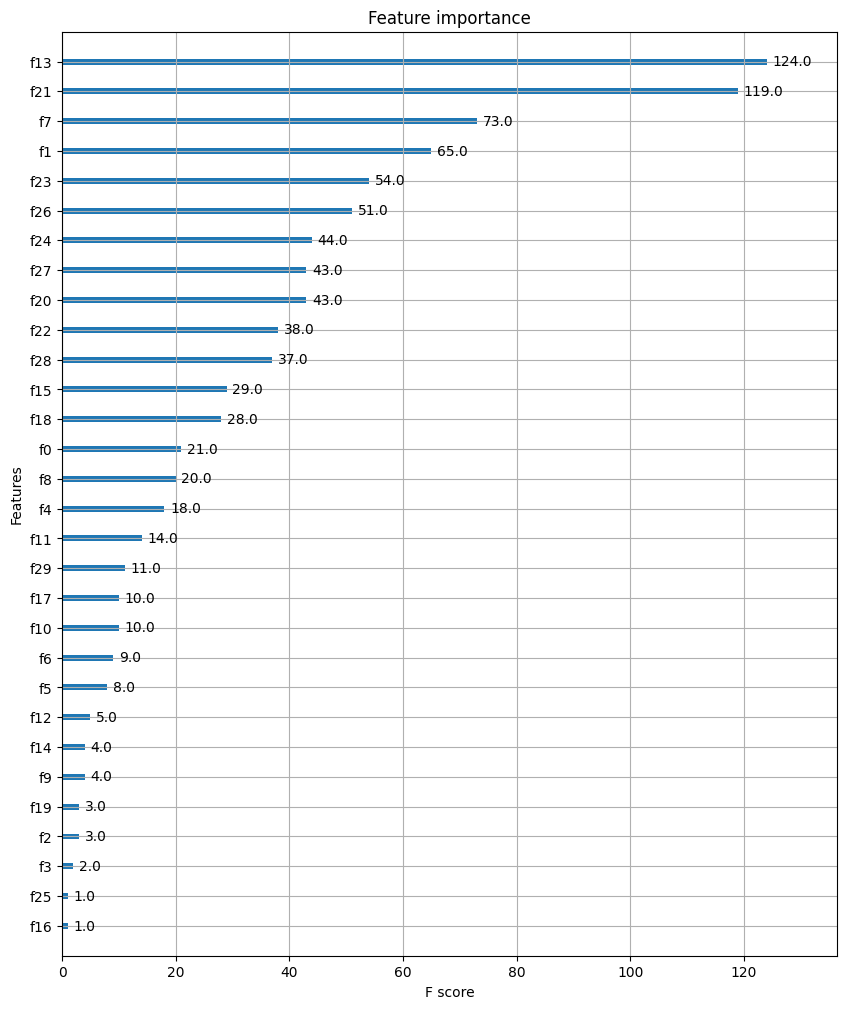

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (10,12))
plot_importance(xgb_model, ax=ax)

- **plot_importance()**: 피처의 중요도를 막대 그래프 형식으로 나타냄. 기본 평가 지표로 f스코어 기반으로 해당 피처의 중요도를 나타냄.
- f스코어: 해당 피처가 트리 분할 시 얼마나 자주 사용되었는지를 지표로 나타낸 값
- plot_importance() 호출 시 파라미터로 앞에서 학습이 완료된 모델 객체 및 맷플롯립의 ax 객체 입력하기만 하면 됨.
- **xgboost.cv**: 데이터 세트에 대한 교차 검증 수행 후 최적 파라미터를 구할 수 있는 방법을 cv() API로 제공.

### 사이킷런 래퍼 XGBoost의 개요 및 적용

XGBoost
- fit(), predict()만으로 학습, 예측 가능
- XGBClassifier: 분류를 위한 래퍼 클래스
- XGBRegressor: 회귀를 위한 래퍼 클래스

< 파라미터 변경 >
- eta -> learning_rate
- sub_sample -> subsample
- lambda -> reg_lambda
- alpha -> reg_alpha
- n_estimators = num_boost_round

In [13]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

# Warning 메시지를 없애기 위해 eval_metric 값을 XGBClassifier 생성 인자로 입력
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3, eval_metric='logloss')
xgb_wrapper.fit(X_train,y_train, verbose=True)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

In [18]:
get_clf_eval(y_test, w_preds, w_pred_proba)

정확도: 0.9561, 정밀도: 0.9530, 재현율: 0.9465, F1: 0.9496
ROC AUC: 0.9954


파이썬 래퍼 XGBoost보다 더 좋은 평가 결과가 나옴. 이유는 X_train을 다시 X_tr, X_val로 분리하면서 최종 학습 데이터 건수가 작아지기 때문에 발생한 것으로 추정.

이번에는 **사이킷런 래퍼XGBoost**에서 조기 중단 수행. 조기 중단 관련 파라미터를 fit()에 입력하면 됨.

- early_stopping_rounds: 반복 횟수 지정
- eval_metric: 평가 지표
- eval_set: 성능 평가 수행할 데이터 세트

In [22]:
from xgboost import XGBClassifier

xgb_wrapper=XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3, early_stopping_rounds=50, eval_metric='logloss')
evals=[(X_tr,y_tr),(X_val,y_val)]
xgb_wrapper.fit(X_tr,y_tr, verbose=True,eval_set=evals)

ws50_preds=xgb_wrapper.predict(X_test)
ws50_pred_proba=xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.62480	validation_1-logloss:0.63104
[1]	validation_0-logloss:0.58674	validation_1-logloss:0.60478
[2]	validation_0-logloss:0.55226	validation_1-logloss:0.58223
[3]	validation_0-logloss:0.52086	validation_1-logloss:0.56184
[4]	validation_0-logloss:0.49192	validation_1-logloss:0.54118
[5]	validation_0-logloss:0.46537	validation_1-logloss:0.52223
[6]	validation_0-logloss:0.44029	validation_1-logloss:0.50287
[7]	validation_0-logloss:0.41666	validation_1-logloss:0.48620
[8]	validation_0-logloss:0.39525	validation_1-logloss:0.46974
[9]	validation_0-logloss:0.37542	validation_1-logloss:0.45497
[10]	validation_0-logloss:0.35701	validation_1-logloss:0.44131
[11]	validation_0-logloss:0.33982	validation_1-logloss:0.43134
[12]	validation_0-logloss:0.32297	validation_1-logloss:0.41972
[13]	validation_0-logloss:0.30725	validation_1-logloss:0.40902
[14]	validation_0-logloss:0.29327	validation_1-logloss:0.39883
[15]	validation_0-logloss:0.27946	validation_1-logloss:0.38968
[1

In [24]:
get_clf_eval(y_test, ws50_preds, ws50_pred_proba)

정확도: 0.9649, 정밀도: 0.9600, 재현율: 0.9600, F1: 0.9600
ROC AUC: 0.9961


조기 중단값을 너무 급격하게 줄이면 예측 성능이 저하될 우려가 큼.

In [27]:
from xgboost import XGBClassifier

xgb_wrapper=XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3, early_stopping_rounds=10, eval_metric='logloss')
evals=[(X_tr,y_tr),(X_val,y_val)]
xgb_wrapper.fit(X_tr,y_tr, verbose=True,eval_set=evals)

ws10_preds=xgb_wrapper.predict(X_test)
ws10_pred_proba=xgb_wrapper.predict_proba(X_test)[:,1]

get_clf_eval(y_test, ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.62480	validation_1-logloss:0.63104
[1]	validation_0-logloss:0.58674	validation_1-logloss:0.60478
[2]	validation_0-logloss:0.55226	validation_1-logloss:0.58223
[3]	validation_0-logloss:0.52086	validation_1-logloss:0.56184
[4]	validation_0-logloss:0.49192	validation_1-logloss:0.54118
[5]	validation_0-logloss:0.46537	validation_1-logloss:0.52223
[6]	validation_0-logloss:0.44029	validation_1-logloss:0.50287
[7]	validation_0-logloss:0.41666	validation_1-logloss:0.48620
[8]	validation_0-logloss:0.39525	validation_1-logloss:0.46974
[9]	validation_0-logloss:0.37542	validation_1-logloss:0.45497
[10]	validation_0-logloss:0.35701	validation_1-logloss:0.44131
[11]	validation_0-logloss:0.33982	validation_1-logloss:0.43134
[12]	validation_0-logloss:0.32297	validation_1-logloss:0.41972
[13]	validation_0-logloss:0.30725	validation_1-logloss:0.40902
[14]	validation_0-logloss:0.29327	validation_1-logloss:0.39883
[15]	validation_0-logloss:0.27946	validation_1-logloss:0.38968
[1

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

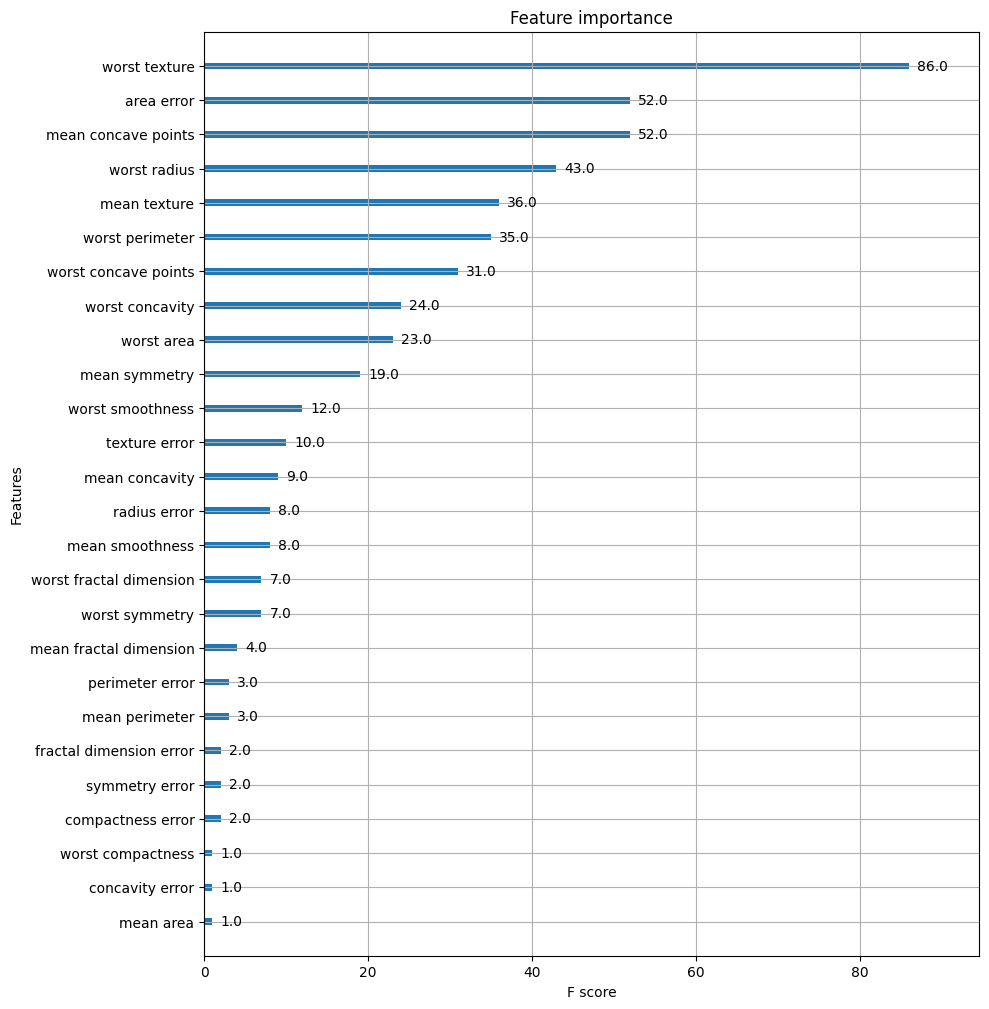

In [28]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))

# 사이킷런 래퍼 클래스를 입력해도 무방
plot_importance(xgb_wrapper, ax=ax)